In [11]:
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

# Datasets
## Face datasets
- FEI Face Database (http://fei.edu.br/~cet/facedatabase.html)

## No Face datasets
- Download Google "view" images

In [2]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 350464)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                22429760  
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
________________________________________________________________

In [3]:
batch_size = 16


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('images/train', target_size=(150, 150), batch_size=batch_size, class_mode='binary')

Found 980 images belonging to 2 classes.


In [19]:
train_generator[0]

(array([[[[ 0.80132097,  0.89411771,  0.95294124],
          [ 0.80134434,  0.89411771,  0.95294124],
          [ 0.79613841,  0.89571798,  0.95336974],
          ..., 
          [ 0.47713161,  0.56763899,  0.73368984],
          [ 0.47191194,  0.56398469,  0.72515613],
          [ 0.46514705,  0.5529412 ,  0.724608  ]],
 
         [[ 0.80766946,  0.89411771,  0.95294124],
          [ 0.80769289,  0.89411771,  0.95294124],
          [ 0.81243187,  0.89174002,  0.95535868],
          ..., 
          [ 0.48624158,  0.56925946,  0.72608238],
          [ 0.48053947,  0.5638268 ,  0.72360003],
          [ 0.46997592,  0.55790502,  0.72322327]],
 
         [[ 0.81401801,  0.90029252,  0.95602864],
          [ 0.81211573,  0.90416729,  0.9502632 ],
          [ 0.8158685 ,  0.90215439,  0.9511261 ],
          ..., 
          [ 0.49564782,  0.56782788,  0.71517354],
          [ 0.49002239,  0.56146348,  0.72075605],
          [ 0.48086095,  0.5610767 ,  0.72367567]],
 
         ..., 
         [

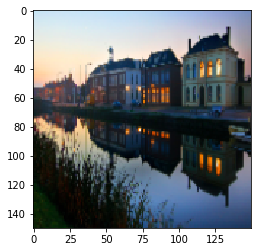

In [32]:
plt.imshow(train_generator[0][0][0])

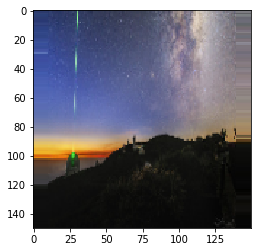

In [24]:
plt.imshow(train_generator[0][0][1])

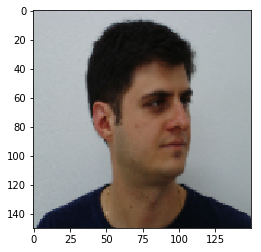

In [28]:
plt.imshow(train_generator[0][0][2])

In [27]:
test_generator = test_datagen.flow_from_directory('images/validation', target_size=(150, 150), batch_size=batch_size, class_mode='binary')

Found 420 images belonging to 2 classes.


In [7]:
callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, 
                                       write_grads=False, write_images=False, embeddings_freq=0, 
                                       embeddings_layer_names=None, embeddings_metadata=None)

In [8]:
model.fit_generator(train_generator, steps_per_epoch=980 // batch_size, epochs=10, 
                    validation_data=test_generator, validation_steps=420 // batch_size, callbacks=[callback])

Epoch 1/10
60/61 [============================>.] - ETA: 1s - loss: 2.3682 - acc: 0.8115

/anaconda3/lib/python3.6/site-packages/PIL/Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


61/61 [==============================] - 89s 1s/step - loss: 2.3299 - acc: 0.8136 - val_loss: 0.0240 - val_acc: 0.9928
Epoch 2/10
61/61 [==============================] - 79s 1s/step - loss: 0.1692 - acc: 0.9744 - val_loss: 0.0684 - val_acc: 0.9904
Epoch 3/10
61/61 [==============================] - 81s 1s/step - loss: 0.1008 - acc: 0.9846 - val_loss: 0.0174 - val_acc: 0.9976
Epoch 4/10
61/61 [==============================] - 78s 1s/step - loss: 0.1376 - acc: 0.9826 - val_loss: 0.0359 - val_acc: 0.9928
Epoch 5/10
61/61 [==============================] - 90s 1s/step - loss: 0.1173 - acc: 0.9836 - val_loss: 0.0110 - val_acc: 0.9976
Epoch 6/10
61/61 [==============================] - 94s 2s/step - loss: 0.0392 - acc: 0.9908 - val_loss: 7.5655e-04 - val_acc: 1.0000
Epoch 7/10
61/61 [==============================] - 78s 1s/step - loss: 0.1020 - acc: 0.9867 - val_loss: 0.0140 - val_acc: 0.9976
Epoch 8/10
61/61 [==============================] - 82s 1s/step - loss: 0.1543 - acc: 0.9857 - va

In [34]:
model.save_weights('first_face_detection_model.h5')